In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier

In [46]:
df=pd.read_csv('new_train2.csv')
test=pd.read_csv('new_test.csv')

In [47]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,failure,no
2,55,retired,married,basic.4y,no,no,no,cellular,jul,mon,550,1,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,nonexistent,no
4,55,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,nonexistent,no


In [48]:
df['label'] = df['y'].apply(lambda x:1 if x=='yes' else 0)

In [49]:
X = df.iloc[:, 0:-1]
Y = df.iloc[:, -1]

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32954 entries, 0 to 32953
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32954 non-null  int64 
 1   job          32954 non-null  object
 2   marital      32954 non-null  object
 3   education    32954 non-null  object
 4   default      32954 non-null  object
 5   housing      32954 non-null  object
 6   loan         32954 non-null  object
 7   contact      32954 non-null  object
 8   month        32954 non-null  object
 9   day_of_week  32954 non-null  object
 10  duration     32954 non-null  int64 
 11  campaign     32954 non-null  int64 
 12  poutcome     32954 non-null  object
 13  y            32954 non-null  object
 14  label        32954 non-null  int64 
dtypes: int64(4), object(11)
memory usage: 3.8+ MB


Text(0.5, 1.0, 'Correlation')

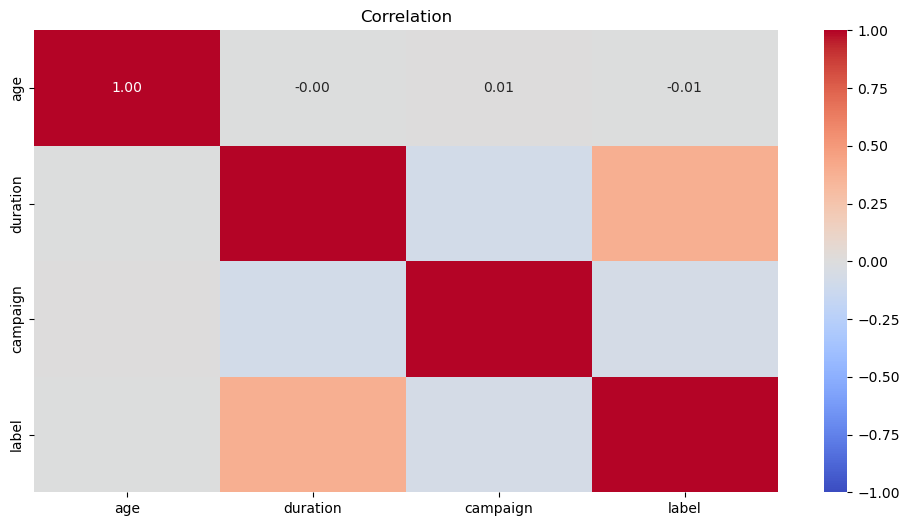

In [52]:
df_numeric = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 6))
heatmap = sns.heatmap(df_numeric.corr(), vmin=-1, vmax=1, annot=True, cmap='coolwarm', fmt=".2f")
heatmap.set_title('Correlation')

In [53]:
df['y'].value_counts()


y
no     29241
yes     3713
Name: count, dtype: int64

In [54]:
col=df.columns

In [55]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,y,label
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,nonexistent,no,0
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,failure,no,0
2,55,retired,married,basic.4y,no,no,no,cellular,jul,mon,550,1,nonexistent,yes,1
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,nonexistent,no,0
4,55,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,nonexistent,no,0


In [56]:

print(df['label'].groupby(pd.qcut(df['age'],3)).mean())

age
(25.999, 34.0]    0.130100
(34.0, 44.0]      0.086445
(44.0, 55.0]      0.120131
Name: label, dtype: float64


/var/folders/m_/trd8d3l54qnfg_h7zr0mpfyc0000gn/T/ipykernel_92220/2335597055.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df['label'].groupby(pd.qcut(df['age'],3)).mean())


Feature Engineering category to numeric

In [57]:
def cat2num(col):
    global df
    uni = df.loc[:,col].unique()
    for i in range(len(uni)):
        df[col] = df[col].apply(lambda x:i if x==uni[i] else x)

In [58]:
df1 = df.copy()
del df['day_of_week']
del df['housing']
del df['loan']
df['Age'] = np.where(df['age'] > 44 , 'old',np.where(df['age']  <= 34,'mid', 'young'))
del df['age']

In [59]:

category_col=['job','marital','education','default','contact','month','poutcome','Age']
for i in category_col:
    cat2num(i)

standardization

In [60]:
X = df.drop(['label'],axis=1)
Y = df.loc[:, 'label']

In [61]:
mean=X['duration'].mean()
sd=X['duration'].std()
X.loc[:,'duration']=X.loc[:,'duration'].apply(lambda x: (x-mean)/sd)

X and Y have been finalized here

Text(0.5, 1.0, 'Correlation')

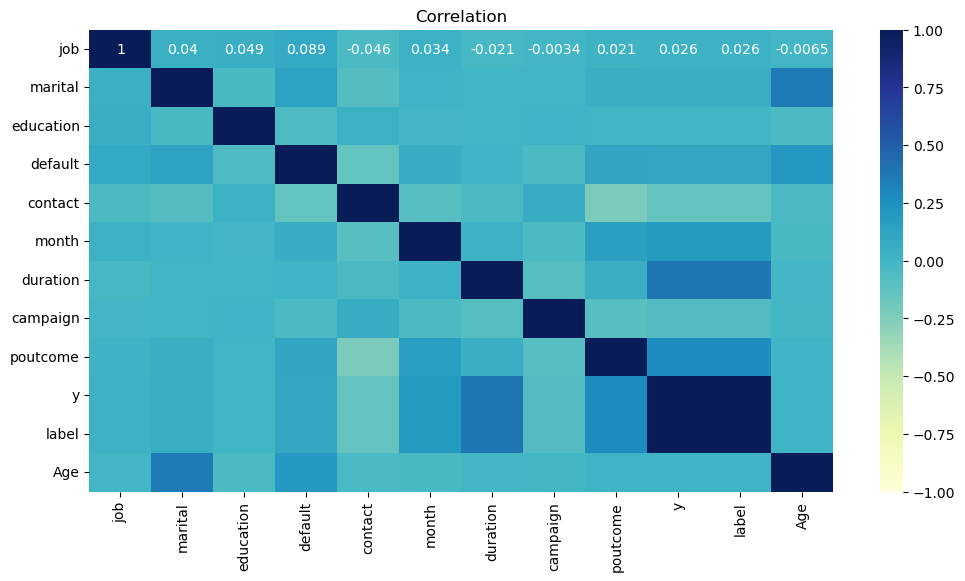

In [62]:
from sklearn.preprocessing import LabelEncoder
# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Encode the categorical variables
df_encoded = df1.apply(label_encoder.fit_transform)

# Plot the correlation heatmap
plt.figure(figsize=(12, 6))
heatmap = sns.heatmap(df_encoded.corr(), vmin=-1, vmax=1, annot=True, cmap='YlGnBu')
heatmap.set_title('Correlation')